In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 7
fig_height = 5
fig_format = :retina
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie
  
  CairoMakie.activate!(type = string(fig_format))
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/Users/krise/Documents/GitHub/private/tidier4ds"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


In [2]:
using Tidier

In [3]:
Pkg.add("Tidier")
using TidierData

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [4]:
using PalmerPenguins, DataFrames
penguins = DataFrame(PalmerPenguins.load())

Row,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
,String15,String15,Float64?,Float64?,Int64?,Int64?,String7
1,Adelie,Torgersen,39.1,18.7,181,3750,male
2,Adelie,Torgersen,39.5,17.4,186,3800,female
3,Adelie,Torgersen,40.3,18.0,195,3250,female
4,Adelie,Torgersen,missing,missing,missing,missing,missing
5,Adelie,Torgersen,36.7,19.3,193,3450,female
6,Adelie,Torgersen,39.3,20.6,190,3650,male
7,Adelie,Torgersen,38.9,17.8,181,3625,female
8,Adelie,Torgersen,39.2,19.6,195,4675,male
9,Adelie,Torgersen,34.1,18.1,193,3475,missing


In [5]:
penguins

Row,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
,String15,String15,Float64?,Float64?,Int64?,Int64?,String7
1,Adelie,Torgersen,39.1,18.7,181,3750,male
2,Adelie,Torgersen,39.5,17.4,186,3800,female
3,Adelie,Torgersen,40.3,18.0,195,3250,female
4,Adelie,Torgersen,missing,missing,missing,missing,missing
5,Adelie,Torgersen,36.7,19.3,193,3450,female
6,Adelie,Torgersen,39.3,20.6,190,3650,male
7,Adelie,Torgersen,38.9,17.8,181,3625,female
8,Adelie,Torgersen,39.2,19.6,195,4675,male
9,Adelie,Torgersen,34.1,18.1,193,3475,missing


In [6]:
@glimpse(penguins)

Rows: 344
Columns: 7
.species       InlineStrings.String15Adelie, Adelie, Adelie, Adelie, Adelie, Ade
.island        InlineStrings.String15Torgersen, Torgersen, Torgersen, Torgersen,
.bill_length_mmUnion{Missing, Float64}39.1, 39.5, 40.3, missing, 36.7, 39.3, 38.
.bill_depth_mm Union{Missing, Float64}18.7, 17.4, 18.0, missing, 19.3, 20.6, 17.
.flipper_length_mmUnion{Missing, Int64}181, 186, 195, missing, 193, 190, 181, 19
.body_mass_g   Union{Missing, Int64}3750, 3800, 3250, missing, 3450, 3650, 3625,
.sex           Union{Missing, InlineStrings.String7}male, female, female, missin


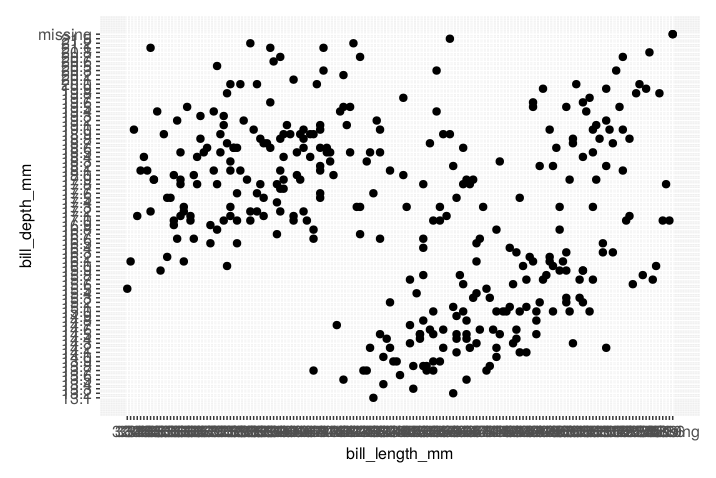

TidierPlots.GGPlot(Any[TidierPlots.Geom(Dict("x" => :bill_length_mm, "y" => :bill_depth_mm), Dict{String, Any}("geom_name" => "geom_point"), Layer(identity, nothing, Any[], {}), Layer(AlgebraOfGraphics.Visual(MakieCore.Scatter, {}), nothing, Any[], {}), Layer(identity, nothing, Any[], {}), ["x", "y"], Dict("strokecolor" => "strokecolor", "colour" => "color", "glowcolor" => "glowcolor", "stroke" => "strokewidth", "label" => "text", "alpha" => "alpha", "strokecolour" => "strokecolor", "size" => "markersize", "glowcolour" => "glowcolor", "errorbar_direction" => "direction"…), Dict{Any, Any}())], Dict("x" => :bill_length_mm, "y" => :bill_depth_mm), Layer(identity, 344×7 DataFrameColumns
 Row │ species    island     bill_length_mm  bill_depth_mm  flipper_length_mm  ⋯
     │ String15   String15   Float64?        Float64?       Int64?             ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Adelie     Torgersen            39.1           18.7       

In [7]:
@ggplot(penguins, aes(x = bill_length_mm, y = bill_depth_mm)) +
  @geom_point()

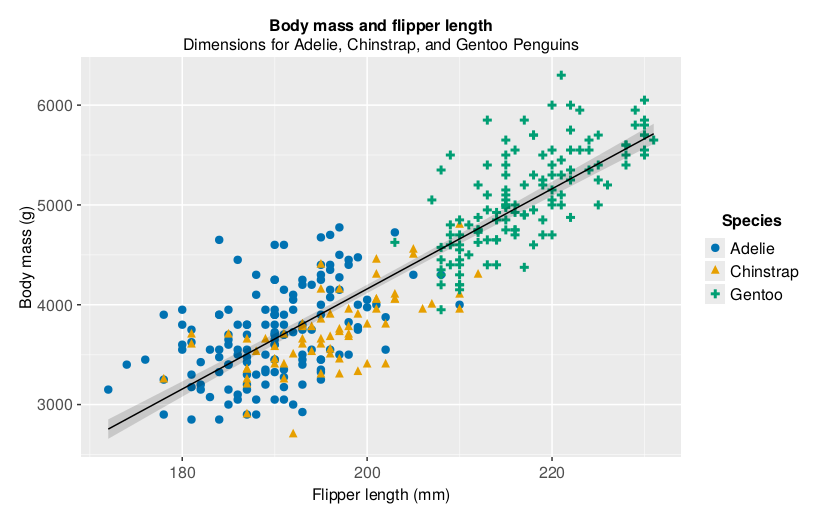

TidierPlots.GGPlot(Any[TidierPlots.Geom(Dict("shape" => :species, "x" => :flipper_length_mm, "color" => :species, "y" => :body_mass_g), Dict{String, Any}("geom_name" => "geom_point"), Layer(identity, nothing, Any[], {}), Layer(AlgebraOfGraphics.Visual(MakieCore.Scatter, {}), nothing, Any[], {}), Layer(identity, nothing, Any[], {}), ["x", "y"], Dict("strokecolor" => "strokecolor", "colour" => "color", "glowcolor" => "glowcolor", "stroke" => "strokewidth", "label" => "text", "alpha" => "alpha", "strokecolour" => "strokecolor", "size" => "markersize", "glowcolour" => "glowcolor", "errorbar_direction" => "direction"…), Dict{Any, Any}()), TidierPlots.Geom(Dict("x" => :flipper_length_mm, "y" => :body_mass_g), Dict{String, Any}("method" => "lm", "geom_name" => "geom_smooth"), Layer(identity, nothing, Any[], {}), Layer(identity, nothing, Any[], {}), Layer(AlgebraOfGraphics.LinearAnalysis{MakieCore.Automatic}(200, false, MakieCore.Automatic(), 0.95), nothing, Any[], {}), ["x", "y"], Dict("strok

In [8]:
# TODO: should automatically omitt rows with missing variables!
penguins_no_missing = dropmissing(penguins)
@ggplot(penguins_no_missing, aes(x = flipper_length_mm, y = body_mass_g)) +
  @geom_point(aes(color = species, shape = species)) +
  @geom_smooth(method = "lm") +
  @labs(
    title = "Body mass and flipper length",
    subtitle = "Dimensions for Adelie, Chinstrap, and Gentoo Penguins",
    x = "Flipper length (mm)", y = "Body mass (g)",
    color = "Species", shape = "Species"
  )

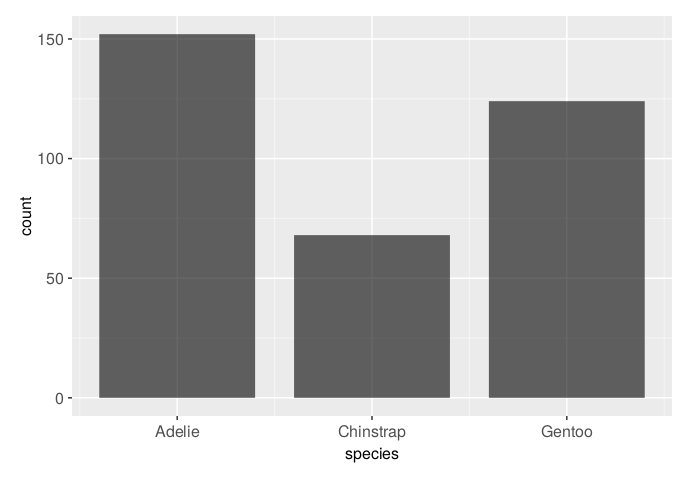

TidierPlots.GGPlot(Any[TidierPlots.Geom(Dict("x" => :species), Dict{String, Any}("geom_name" => "geom_bar"), Layer(identity, nothing, Any[], {}), Layer(AlgebraOfGraphics.Visual(MakieCore.Combined{Makie.barplot}, {}), nothing, Any[], {}), Layer(AlgebraOfGraphics.FrequencyAnalysis(), nothing, Any[], {}), ["x"], Dict("strokecolor" => "strokecolor", "colour" => "color", "glowcolor" => "glowcolor", "stroke" => "strokewidth", "label" => "text", "alpha" => "alpha", "strokecolour" => "strokecolor", "size" => "markersize", "glowcolour" => "glowcolor", "errorbar_direction" => "direction"…), Dict{Any, Any}())], Dict("x" => :species), Layer(identity, 344×7 DataFrameColumns
 Row │ species    island     bill_length_mm  bill_depth_mm  flipper_length_mm  ⋯
     │ String15   String15   Float64?        Float64?       Int64?             ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Adelie     Torgersen            39.1           18.7                181  ⋯
   2 │

In [9]:
@ggplot(penguins, aes(x = species)) +
  @geom_bar()

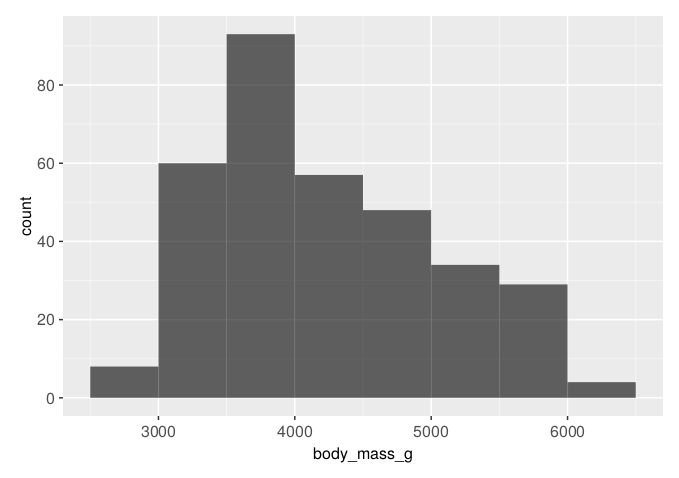

TidierPlots.GGPlot(Any[TidierPlots.Geom(Dict("x" => :body_mass_g), Dict{String, Any}("geom_name" => "geom_histogram", "binwidth" => 200), Layer(identity, nothing, Any[], {}), Layer(identity, nothing, Any[], {}), Layer(AlgebraOfGraphics.HistogramAnalysis{MakieCore.Automatic, MakieCore.Automatic}(MakieCore.Automatic(), MakieCore.Automatic(), :left, :none), nothing, Any[], {}), ["x"], Dict("strokecolor" => "strokecolor", "colour" => "color", "glowcolor" => "glowcolor", "stroke" => "strokewidth", "label" => "text", "alpha" => "alpha", "strokecolour" => "strokecolor", "size" => "markersize", "glowcolour" => "glowcolor", "errorbar_direction" => "direction"…), Dict{Any, Any}())], Dict("x" => :body_mass_g), Layer(identity, 333×7 DataFrameColumns
 Row │ species    island     bill_length_mm  bill_depth_mm  flipper_length_mm  ⋯
     │ String15   String15   Float64         Float64        Int64              ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Ad

In [10]:
# TODO: should automatically omitt rows with missing variables!
penguins_no_missing = dropmissing(penguins)
@ggplot(penguins_no_missing, aes(x = body_mass_g)) +
  @geom_histogram(binwidth = 200)

In [11]:
#| eval: false
# TODO: @geom_density() does not exist yet!
@ggplot(penguins, aes(x = body_mass_g)) +
  @geom_density()

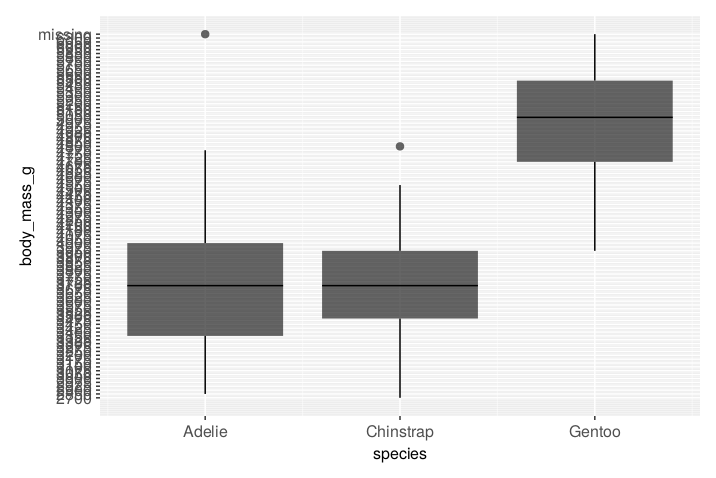

TidierPlots.GGPlot(Any[TidierPlots.Geom(Dict("x" => :species, "y" => :body_mass_g), Dict{String, Any}("geom_name" => "geom_boxplot"), Layer(identity, nothing, Any[], {}), Layer(AlgebraOfGraphics.Visual(MakieCore.Combined{Makie.boxplot}, {}), nothing, Any[], {}), Layer(identity, nothing, Any[], {}), ["x", "y"], Dict("strokecolor" => "strokecolor", "colour" => "color", "glowcolor" => "glowcolor", "stroke" => "strokewidth", "label" => "text", "alpha" => "alpha", "strokecolour" => "strokecolor", "size" => "markersize", "glowcolour" => "glowcolor", "errorbar_direction" => "direction"…), Dict{Any, Any}())], Dict("x" => :species, "y" => :body_mass_g), Layer(identity, 344×7 DataFrameColumns
 Row │ species    island     bill_length_mm  bill_depth_mm  flipper_length_mm  ⋯
     │ String15   String15   Float64?        Float64?       Int64?             ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Adelie     Torgersen            39.1           18.7       

In [12]:
@ggplot(penguins, aes(x = species, y = body_mass_g)) +
  @geom_boxplot()

In [13]:
#| eval: false
# TODO: @geom_density() does not exist yet!
@ggplot(penguins, aes(x = body_mass_g, color = species, fill = species)) +
  @geom_density(linewidth = 0.75, alpha = 0.5)

In [14]:
#| eval: false
# TODO: check why Adelie is missing for all islands but Torgersen
@ggplot(penguins, aes(x = island, color = species)) +
  @geom_bar()

In [15]:
#| eval: false
# TODO: position = "fill" does not work yet! 
@ggplot(penguins, aes(x = island, color = species)) +
  @geom_bar(position = "fill")

In [16]:
#| eval: false
# TODO: @facet_wrap() is not defined yet!
@ggplot(penguins, aes(x = flipper_length_mm, y = body_mass_g)) +
  @geom_point(aes(color = species, shape = species)) +
  @facet_wrap(~island)

In [17]:
#| eval: false
# TODO: @ggsave() is not defined yet!
plot = @ggplot(penguins, aes(x = flipper_length_mm, y = body_mass_g)) +
  @geom_point()
@ggsave(plot, filename = "penguin-plot.png")